# 1. Setup

In [1]:
!pwd

/home/umni2/a/umnilab/users/verma99/mk/spr_4711/code


In [2]:
from mobilkit.umni import *
from project import *

# 2. Load data

## 2.1. Zones

In [3]:
zones = gpd.read_parquet('../data/zones/zones2010.parquet').to_crs(CRS_M).disp()

6,417 rows x 6 cols; Memory: 1.4 MiB; CRS: EPSG:3857


,geoid,name,aland,awater,geometry,scale
,<object>,<object>,<int64>,<int64>,<geometry>,<object>
0,18083,Knox,1336514262,20755159,"POLYGON ((-9741147.962964 4683574.018353, -974...",COUNTY


## 2.2. Census

In [16]:
acs = pd.read_csv('../data/acs/acs_2013.csv').disp(0)

4,808 rows x 33 cols; Memory: 1.2 MiB


,geoid,popu,hh,age_minor,age_adult,age_senior,age_median,sex_female,sex_male,race_white,race_black,edu_eligible,edu_bachelors,employ_total,employ_in_LF,employ_not_in_LF,inc_total,inc_avg,inc_total_hh,inc_median,pop_poor,pop_nonpoor,hh_poor,hh_nonpoor,cm_car,cm_pool,cm_pt,cm_bus,cm_subway,cm_taxi,cm_bike,cm_walk,cm_wfm
,<int64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>


## 2.3. AAA

In [4]:
aaa = pd.read_parquet('../data/aaa/aaa.parquet').disp()

718,032 rows x 7 cols; Memory: 10.9 MiB


,scale,mode,tmax,geoid,category,njobs,is_rac
,<category>,<category>,<category>,<category>,<category>,<float64>,<bool>
0,COUNTY,BIKE,15,18001,TOTAL,1186.442203,True


## 2.4. LODES

In [5]:
lodes = pd.read_parquet('../data/lodes/lodes_od.parquet').disp()

10,596,327 rows x 5 cols; Memory: 102.4 MiB


,source,target,scale,category,njobs
,<category>,<category>,<category>,<category>,<int32>
0,18001,18001,COUNTY,TOTAL,7488


In [6]:
od = lodes.query('scale=="COUNTY"').pivot_table('njobs','source','target').fillna(0).disp()

92 rows x 92 cols; Memory: 0.7 MiB


target,18001,18003,18005,18007,18009,18011,18013,18015,18017,18019,18021,18023,18025,18027,18029,18031,18033,18035,18037,18039,18041,18043,18045,18047,18049,18051,18053,18055,18057,18059,18061,18063,18065,18067,18069,18071,18073,18075,18077,18079,18081,18083,18085,18087,18089,18091,18093,18095,18097,18099,18101,18103,18105,18107,18109,18111,18113,18115,18117,18119,18121,18123,18125,18127,18129,18131,18133,18135,18137,18139,18141,18143,18145,18147,18149,18151,18153,18155,18157,18159,18161,18163,18165,18167,18169,18171,18173,18175,18177,18179,18181,18183
source,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>
18001,3209.142857,1154.142857,12.428571,0.0,8.142857,13.714286,0.857143,0.857143,10.285714,6.0,2.571429,4.714286,0.0,0.428571,1.285714,3.0,42.857143,39.428571,2.571429,74.571429,4.285714,2.142857,0.0,2.571429,9.0,0.428571,72.857143,0.428571,71.142857,3.857143,0.857143,27.428571,4.285714,22.714286,66.857143,6.0,1.714286,115.714286,1.285714,0.857143,25.714286,1.285714,44.571429,10.714286,35.142857,11.571429,4.285714,27.857143,240.0,10.714286,0.857143,8.571429,16.714286,3.428571,3.0,1.285714,42.857143,0.0,0.0,0.0,0.428571,1.285714,0.857143,12.857143,0.428571,0.428571,4.285714,3.0,1.285714,1.714286,70.285714,1.285714,9.0,0.0,0.428571,19.285714,0.0,0.0,47.571429,0.857143,0.857143,9.857143,0.428571,10.714286,27.428571,0.428571,0.0,1.285714,10.714286,434.142857,3.428571,29.142857


<Axes: xlabel='target', ylabel='source'>

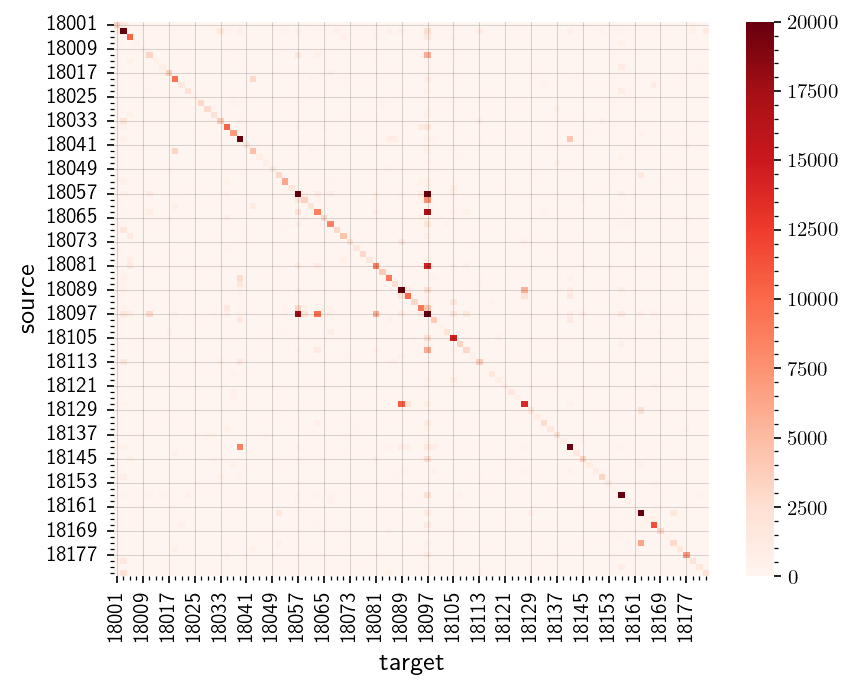

In [7]:
sns.heatmap(od, vmax=20000, cmap='Reds')

## 2.5. Travel times

In [13]:
tt = pd.read_parquet('../data/distance/travel_times.parquet').disp()

7,620,668 rows x 5 cols; Memory: 103.1 MiB


,source,target,time,scale,mode
,<category>,<category>,<float64>,<category>,<category>
0,18051,18083,1931.0,COUNTY,DRIVE


## 2.6. Job accessibility

In [9]:
def get_job_access(lodes=lodes, tt=tt, tmaxes=MAX_TT):
    tt = tt.assign(time=tt.time / 60).drop(columns='scale')
    xs = []
    for tmax in tqdm(tmaxes):
        tt2 = tt.query(f'time <= {tmax}')
        df = (lodes.merge(tt2, on=['source', 'target'])
              .groupby(['category', 'mode', 'source'])
              ['njobs'].sum().reset_index()
              .rename(columns={'source': 'geoid'}))
        xs.append(df.assign(tmax=str(tmax)))
    xs = pd.concat(xs).reset_index(drop=True)
    xs = xs.query('njobs > 0').astype({x: CAT for x in [
        'mode', 'tmax', 'category', 'geoid']})
    return xs

xs = get_job_access().disp() # t=0:15

  0%|          | 0/4 [00:00<?, ?it/s]

514,335 rows x 5 cols; Memory: 9.0 MiB


,category,mode,geoid,njobs,tmax
,<category>,<category>,<category>,<int32>,<category>
4,AGE_HIGH,BIKE,180010301004,10,15


<Axes: >

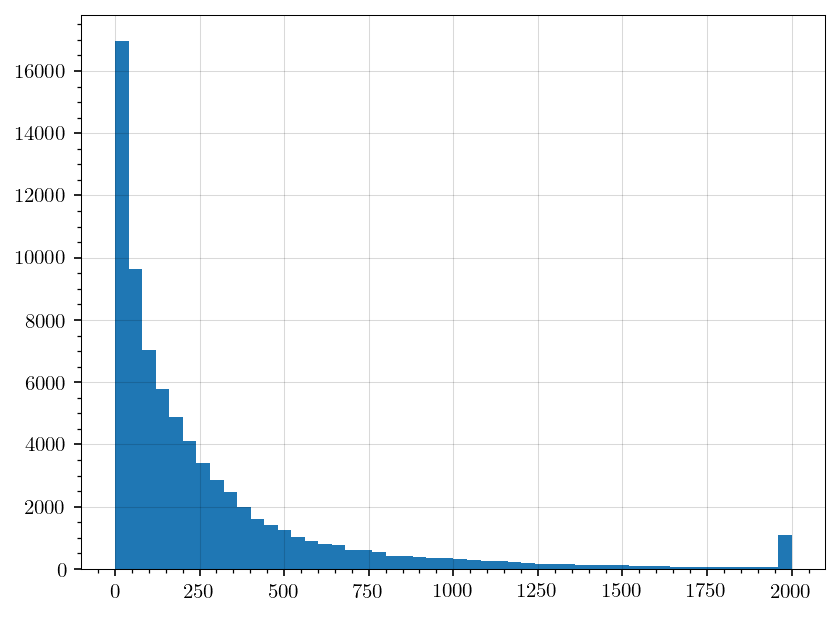

In [10]:
xs.query('category=="TOTAL" & njobs>0').njobs.clip(0, 2000).hist(bins=50)

In [11]:
aaa.disp();pass

718,032 rows x 7 cols; Memory: 10.9 MiB


,scale,mode,tmax,geoid,category,njobs,is_rac
,<category>,<category>,<category>,<category>,<category>,<float64>,<bool>
0,COUNTY,BIKE,15,18001,TOTAL,1186.442203,True


<Axes: >

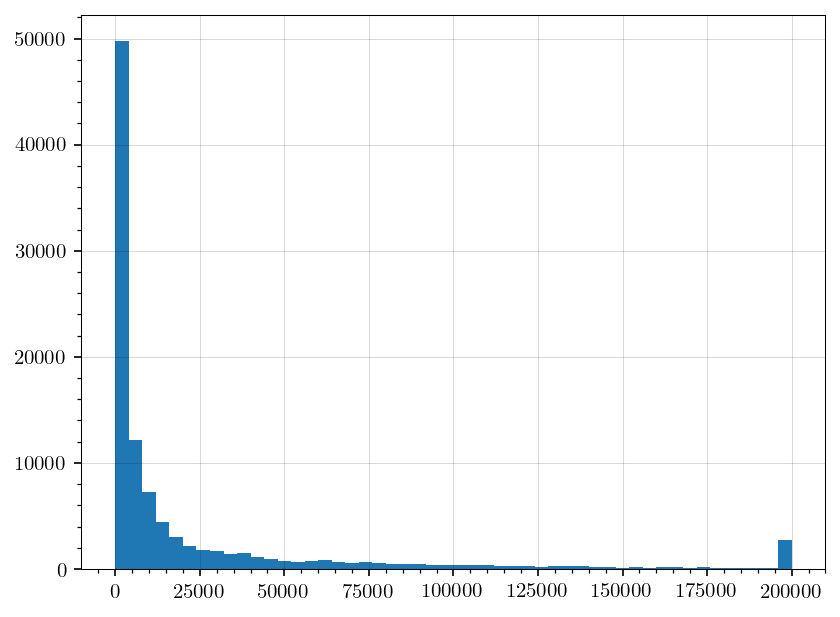

In [12]:
aaa.query('category=="TOTAL"').njobs.clip(0, 2e5).hist(bins=50)

In [18]:
aaa

,scale,mode,tmax,geoid,category,njobs,is_rac
0,COUNTY,BIKE,15,18001,TOTAL,1186.442203,True
1,COUNTY,BIKE,15,18003,TOTAL,7248.322908,True
2,COUNTY,BIKE,15,18005,TOTAL,4593.375054,True
3,COUNTY,BIKE,15,18007,TOTAL,280.208447,True
4,COUNTY,BIKE,15,18009,TOTAL,1247.210740,True
...,...,...,...,...,...,...,...
718027,BG,TRANSIT,60,181830506001,SALARY_HIGH,642.000000,False
718028,BG,TRANSIT,60,181830506002,SALARY_HIGH,1123.293103,False
718029,BG,TRANSIT,60,181830507001,SALARY_HIGH,143.236364,False
718030,BG,TRANSIT,60,181830507002,SALARY_HIGH,40.881356,False


AttributeError: Line2D.set() got an unexpected keyword argument 'vmax'

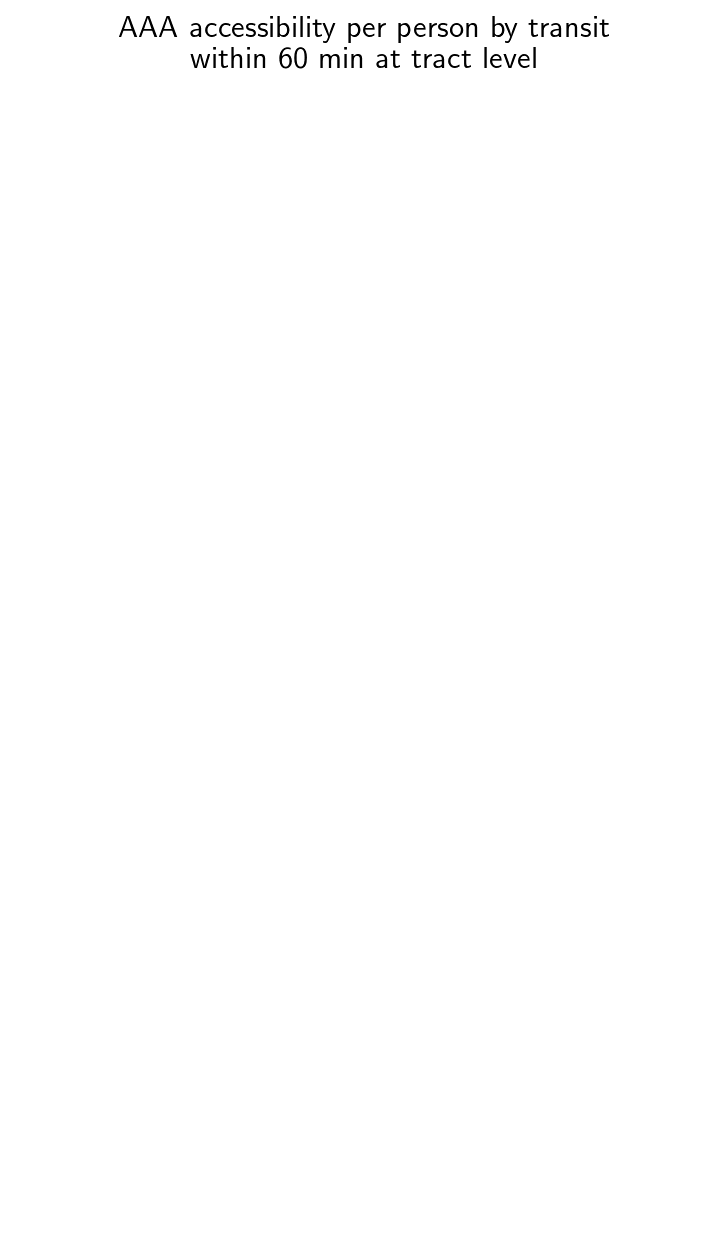

In [ ]:
title = 'AAA accessibility per person by transit\nwithin 60 min at tract level'
ax = U.plot(size=(6, 10), axoff=1, title=title)
aaa.plot(ax=ax, column='value_per_person', cmap='Greens',
         legend=True, vmax=1e3, ec='k', lw=0.05,
         legend_kwds=dict(shrink=0.5, label='No. of jobs'))
zones.query('scale=="COUNTY"').plot(ax=ax, fc='none', ec='k', lw=0.5);

## 2.7. LODES data

In [6]:
df = pd.read_parquet('../data/lodes/od.parquet'); df

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03
0,180010301001017,180010301001054,1,0,0,1,1,0,0,0,0,1
1,180010301001017,180010301004041,1,0,0,1,0,1,0,0,0,1
2,180010301001017,180010302001003,1,0,1,0,1,0,0,1,0,0
3,180010301001017,180010302003056,1,0,1,0,0,1,0,1,0,0
4,180010301001017,180010303001003,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2574934,181830507003040,180030023003002,1,0,0,1,0,1,0,0,1,0
2574935,181830507003040,180030102012019,1,0,0,1,0,0,1,0,1,0
2574936,181830507003040,180030119002029,1,0,0,1,1,0,0,0,1,0
2574937,181830507003040,180859615003001,1,1,0,0,0,1,0,0,1,0


In [4]:
def get_lodes_od(scale, col='S000'):
    df = pd.read_parquet('../data/lodes/od.parquet')
    nchar = {'BG': 12, 'TRACT': 11, 'COUNTY': 5}[scale]
    df['source'] = df['h_geocode'].astype(str).str[:nchar]
    df['target'] = df['w_geocode'].astype(str).str[:nchar]
    df = df.groupby(['source', 'target'])[col].sum().rename('njobs').reset_index()
    return df

od = get_lodes_od('TRACT').disp()

470,203 rows x 3 cols; Memory: 64.6 MiB


,source,target,njobs
,<object>,<object>,<int64>
0,18001030100,18001030100,209


## 2.8. Travel times

In [ ]:
tt_tract = (get_lodes_od('TRACT').query('time <= 60 & mode == "TRANSIT"')
            .drop(columns='mode').reset_index(drop=True)).disp()

  0%|          | 0/4 [00:00<?, ?it/s]

20,909 rows x 3 cols; Memory: 2.9 MiB


,source,target,time
,<object>,<object>,<float64>
0,18105001304,18105001301,54.466667


## 2.9. AAA-type accessibility

In [ ]:
popu = (acs.assign(geoid=acs.geoid.str[:11]).groupby('geoid')['popu'].sum().reset_index()).disp()

1,505 rows x 2 cols; Memory: 0.1 MiB


,geoid,popu
,<object>,<float64>
0,18001030100,4593.0


In [ ]:
xs = (od.merge(tt_tract, on=('source', 'target')).groupby('source')
      ['njobs'].sum().rename_axis('geoid').reset_index().merge(popu, on='geoid')
      .assign(njobs_per_person=lambda df: df.njobs / df.popu))
xs = zones[['geoid', 'geometry']].merge(xs, on='geoid').disp()

947 rows x 5 cols; Memory: 0.1 MiB; CRS: EPSG:4326


,geoid,geometry,njobs,popu,njobs_per_person
,<object>,<geometry>,<int64>,<float64>,<float64>
0,18105001301,"POLYGON ((-86.573543 39.164567, -86.573657 39....",90,5446.0,0.016526


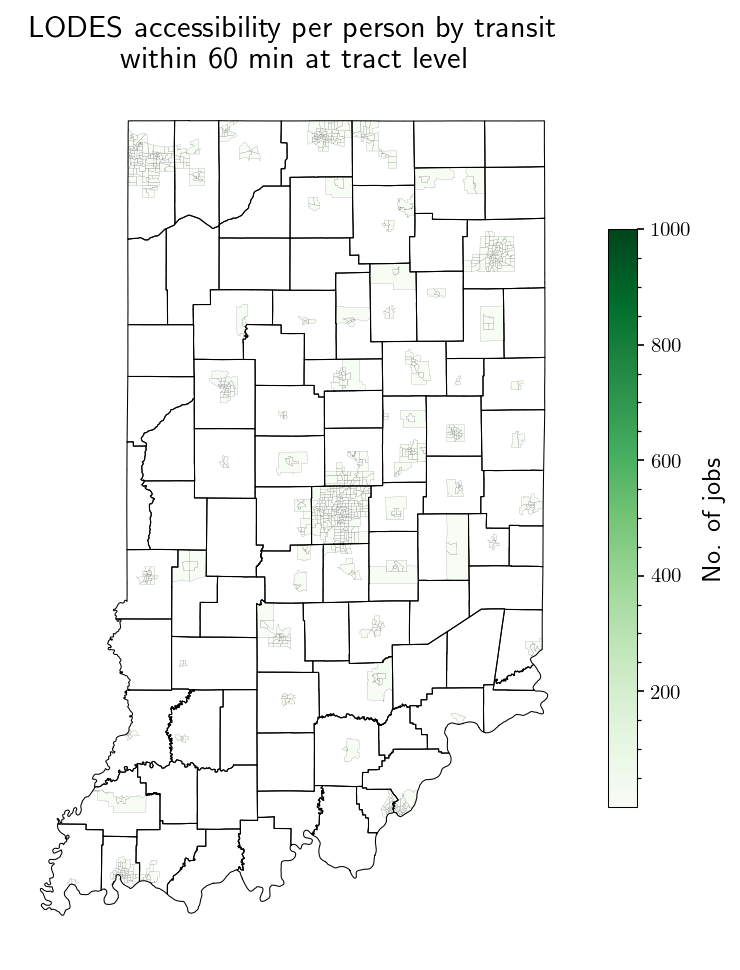

In [ ]:
title = 'LODES accessibility per person by transit\nwithin 60 min at tract level'
ax = U.plot(size=(6, 10), axoff=1, title=title)
xs.plot(ax=ax, column='njobs_per_person', cmap='Greens',
        legend=True, vmax=1e3, ec='k', lw=0.05,
        legend_kwds=dict(shrink=0.5, label='No. of jobs'))
zones.query('scale=="COUNTY"').plot(ax=ax, fc='none', ec='k', lw=0.5);